![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def veryclose(a, b): return np.isclose(a, b, atol=1e-12, rtol=1e-12)

# A convergência do método de Newton

## Questão 1: Lista de iterados do método de Newton

Dê abaixo o método de Newton, começando a partir do ponto x0, e retornando a lista de todos os pontos gerados.
O método para quando:
- ou o tamanho do passo é menor do que `atol`;
- ou o tamanho do passo, relativo ao (valor absoluto do) próximo iterado, é menor do que `rtol`;
- ou forem realizadas mais do que `maxiter` iterações.

In [51]:
def newton(f, df, x0, atol=1e-8, rtol=1e-8, maxiter=100):
    l = [x0]
    while True:
        x1 = x0 - f(x0)/df(x0)
        l.append(x1)
        err = abs(x1 - x0)
        rel = err/abs(x1)

        if err < atol or rel < rtol or maxiter == 0:
            return l
        x0 = x1
        maxiter -= 1


In [52]:
L = newton(np.sin, np.cos, 3)
assert len(L) == 4
assert np.isclose(L[-1], np.pi)

In [53]:
assert np.isclose(L[-2], np.pi)
assert not veryclose(L[-2], np.pi)

In [54]:
def poly1(x):
    return x**3 - x + 1

Dê a derivada da função acima

In [55]:
def d_poly1(x):
    return 3*x**2 - 1

In [56]:
L = newton(poly1, d_poly1, 1, atol=1e-9)
assert len(L) == 22
assert abs(poly1(L[-1])) < 1e-8

## Questão 2: Olhando uma convergência

Observe o gráfico dos iterados produzidos pelo método.
Como se deu a convergência?

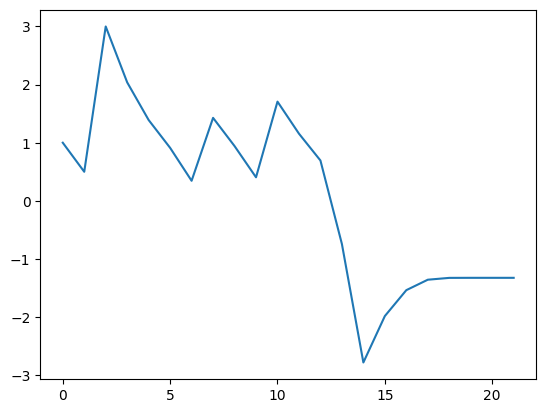

In [57]:
plt.plot(L)

Podemos observar que a convergência se deu de maneira abrupta, caminhando entre pontos acima do valor esperado até descer abaixo e encontra-lo.

Faça um gráfico da função polinomial que ajude a entender porque isso aconteceu.

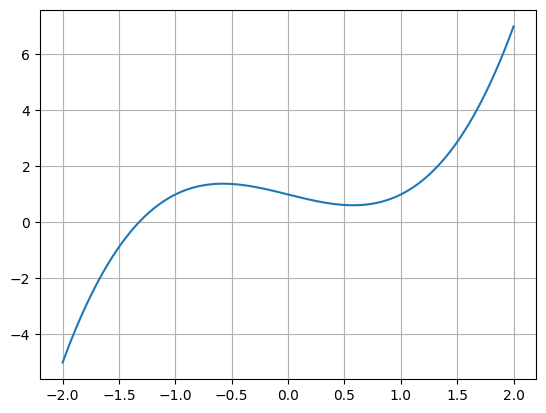

In [58]:
x = np.linspace(-2, 2, 100)
plt.plot(x, poly1(x))
plt.grid()

ax = plt.gca()

In [59]:
l = ax.lines[0]

valores = l.get_ydata()

print(valores)
assert -8 < min(valores) < -1
assert 10 > max(valores) > 2

[-5.         -4.56528452 -4.14976311 -3.75304004 -3.37471955 -3.01440587
 -2.67170326 -2.34621596 -2.03754822 -1.74530428 -1.46908839 -1.2085048
 -0.96315775 -0.73265148 -0.51659025 -0.31457829 -0.12621986  0.04888081
  0.21111946  0.36089185  0.49859373  0.62462086  0.739369    0.84323389
  0.93661129  1.01989696  1.09348665  1.15777611  1.2131611   1.26003737
  1.29880068  1.32984678  1.35357142  1.37037037  1.38063937  1.38477418
  1.38317055  1.37622424  1.36433099  1.34788658  1.32728674  1.30292724
  1.27520383  1.24451226  1.21124829  1.17580766  1.13858615  1.09997949
  1.06038345  1.02019378  0.97980622  0.93961655  0.90002051  0.86141385
  0.82419234  0.78875171  0.75548774  0.72479617  0.69707276  0.67271326
  0.65211342  0.63566901  0.62377576  0.61682945  0.61522582  0.61936063
  0.62962963  0.64642858  0.67015322  0.70119932  0.73996263  0.7868389
  0.84222389  0.90651335  0.98010304  1.06338871  1.15676611  1.260631
  1.37537914  1.50140627  1.63910815  1.78888054  1.951

O que você deduz?

YOUR ANSWER HERE

## Pontos periódicos

É possível que, após 2 iterações do Método de Newton, estejamos próximos do ponto inicial.
Se "acertarmos a mira", voltaremos exatamente ao ponto inicial.

## Questão 3: Equação de pontos periódicos

Determine uma equação **polinomial** que é satisfeita por um ponto 2-periódico para o método de Newton,
aplicado à função polinomial $x^3 - x + 1$.

Sugestão:
- Primeiro, deixe em função de uma variável $y$ que representa o "próximo ponto", e simplifique o que puder.
- Em seguida, substitua $y = N(x)/D(x)$, e elimine os denominadores para obter um polinômio. 

YOUR ANSWER HERE

Qual o grau deste polinômio?

YOUR ANSWER HERE

Agora, defina este polinômio.

Dica: use o numerador e denominador como variáveis intermediárias!

In [60]:
def periodo2(x):
    # YOUR CODE HERE
    raise NotImplementedError()

In [61]:
assert 0.1 < periodo2(1/np.sqrt(3)) < 10

NotImplementedError: 

## Questão 4: Análise dos pontos de período 2

Faça um gráfico deste polinômio.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Faça mais um gráfico, que (junto com o anterior) convença você que este polinômio só tem uma raiz.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Que raiz é esta?
Porque este ponto de período 2 faz sentido?

YOUR ANSWER HERE

## Questão 5: Zeros duplos

Vamos usar Newton fora das hipóteses de convergência quadrática...

In [105]:
def p2(x): return (x - 3)**2
def dp2(x): return 2*x - 6

L = newton(p2, dp2, 4, atol=1e-12, rtol=1e-12)
print(L, len(L))
assert len(L) == 40

[4, 3.5, 3.25, 3.125, 3.0625, 3.03125, 3.015625, 3.0078125, 3.00390625, 3.001953125, 3.0009765625, 3.00048828125, 3.000244140625, 3.0001220703125, 3.00006103515625, 3.000030517578125, 3.0000152587890625, 3.0000076293945312, 3.0000038146972656, 3.000001907348633, 3.0000009536743164, 3.000000476837158, 3.000000238418579, 3.0000001192092896, 3.0000000596046448, 3.0000000298023224, 3.000000014901161, 3.0000000074505806, 3.0000000037252903, 3.000000001862645, 3.0000000009313226, 3.0000000004656613, 3.0000000002328306, 3.0000000001164153, 3.0000000000582077, 3.000000000029104, 3.000000000014552, 3.000000000007276, 3.000000000003638, 3.000000000001819] 40


Faça um gráfico da convergência dos erros

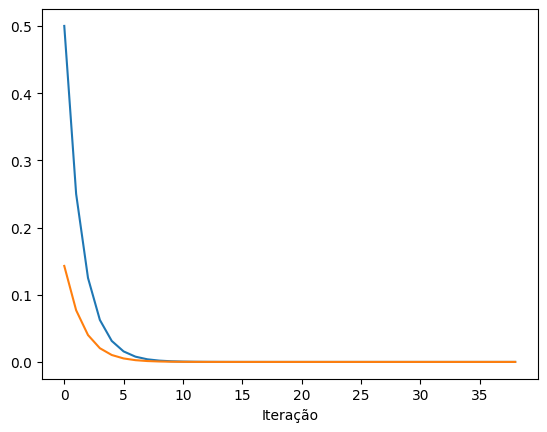

In [119]:
xs = [i for i in range(1, len(L))]

ys_err_abs = [abs(L[i] - L[i-1]) for i in xs]
ys_err_rel = [abs(L[i] - L[i-1])/abs(L[i]) for i in xs]

plt.plot(ys_err_abs, label='Erro Absoluto')
plt.plot(ys_err_rel, label='Erro Relativo')
plt.xlabel('Iteração')

ax = plt.gca()

In [122]:
l = ax.get_lines()[0]
values = l.get_ydata()
print(values, len(values), max(values))
assert len(values) == 40
assert max(values) == 1
assert min(values) < 1e-10

[5.00000000e-01 2.50000000e-01 1.25000000e-01 6.25000000e-02
 3.12500000e-02 1.56250000e-02 7.81250000e-03 3.90625000e-03
 1.95312500e-03 9.76562500e-04 4.88281250e-04 2.44140625e-04
 1.22070312e-04 6.10351562e-05 3.05175781e-05 1.52587891e-05
 7.62939453e-06 3.81469727e-06 1.90734863e-06 9.53674316e-07
 4.76837158e-07 2.38418579e-07 1.19209290e-07 5.96046448e-08
 2.98023224e-08 1.49011612e-08 7.45058060e-09 3.72529030e-09
 1.86264515e-09 9.31322575e-10 4.65661287e-10 2.32830644e-10
 1.16415322e-10 5.82076609e-11 2.91038305e-11 1.45519152e-11
 7.27595761e-12 3.63797881e-12 1.81898940e-12] 39 0.5


AssertionError: 

In [121]:
print(len(ax.get_xlabel()))
assert len(ax.get_xlabel()) > 5

8


Qual a velocidade de convergência destas iterações?

YOUR ANSWER HERE

Qual a fórmula exata do "próximo ponto" para este caso?
Como isso explica o resultado acima?

YOUR ANSWER HERE